In [18]:

"""
Name: Eric Mass
Student Number: 24236422
Dataset: Movie Records
"""

import pandas as pd
df = pd.read_csv('all_movies_data.csv')
movies_list = df.to_dict(orient='records')
for movie in movies_list[:5]:
    print(movie)


{'Name': 'Airplane! (1980)', 'Audience Rating': '7.7 (208,636 votes)', 'Duration': '88 mintues', 'Genres': 'Comedy', 'Director': 'Jim Abrahams, David Zucker', 'Writer': 'Jim Abrahams, David Zucker', 'Studio': 'Paramount Pictures', 'Region': 'USA — English', 'Performance': 'Budget: $3,500,000; Gross Income: $83,453,539', 'Description': 'A man afraid to fly must ensure that a plane lands safely after the pilots become sick.', 'Lead Actors': 'Kareem Abdul-Jabbar, Lloyd Bridges, Peter Graves, Julie Hagerty, Robert Hays, Leslie Nielsen, Lorna Patterson, Robert Stack, Stephen Stucker, Otto, Jim Abrahams, Frank Ashmore, Jonathan Banks, Craig Berenson, Barbara Billingsley'}
{'Name': 'The Shining (1980)', 'Audience Rating': '8.4 (869,480 votes)', 'Duration': '146 mintues', 'Genres': 'Drama, Horror', 'Director': 'Stanley Kubrick', 'Writer': 'Stephen King, Stanley Kubrick', 'Studio': 'Warner Bros.', 'Region': 'UK, USA — English', 'Performance': 'Budget: $19,000,000; Gross Income: $46,520,613', 'D

In [19]:
for m in movies_list:
    date = m["Name"][m["Name"].index("(")+1:m["Name"].index(")")]
    m["Date"] = int(date)
    m["Name"] = m["Name"][:m["Name"].index("(")]
print(movies_list)

[{'Name': 'Airplane! ', 'Audience Rating': '7.7 (208,636 votes)', 'Duration': '88 mintues', 'Genres': 'Comedy', 'Director': 'Jim Abrahams, David Zucker', 'Writer': 'Jim Abrahams, David Zucker', 'Studio': 'Paramount Pictures', 'Region': 'USA — English', 'Performance': 'Budget: $3,500,000; Gross Income: $83,453,539', 'Description': 'A man afraid to fly must ensure that a plane lands safely after the pilots become sick.', 'Lead Actors': 'Kareem Abdul-Jabbar, Lloyd Bridges, Peter Graves, Julie Hagerty, Robert Hays, Leslie Nielsen, Lorna Patterson, Robert Stack, Stephen Stucker, Otto, Jim Abrahams, Frank Ashmore, Jonathan Banks, Craig Berenson, Barbara Billingsley', 'Date': 1980}, {'Name': 'The Shining ', 'Audience Rating': '8.4 (869,480 votes)', 'Duration': '146 mintues', 'Genres': 'Drama, Horror', 'Director': 'Stanley Kubrick', 'Writer': 'Stephen King, Stanley Kubrick', 'Studio': 'Warner Bros.', 'Region': 'UK, USA — English', 'Performance': 'Budget: $19,000,000; Gross Income: $46,520,613'

I figured that the release year should be sepearted from the title, so I made an extra entry for each dictionary, and seperated the name from the year. I also made the year an int so I could do math with it if I wanted to

In [20]:
for m in movies_list:
    votes = m["Audience Rating"][m["Audience Rating"].index("(")+1:m["Audience Rating"].index(")")]
    votes = votes[:votes.index(" ")]
    votes = votes.replace(",", "")
    votes = int(votes)
    m["Votes"] = votes
    m["Audience Rating"] = float(m["Audience Rating"][:m["Audience Rating"].index("(")-1])

    

I wanted the rating and the number of votes to be sepearted, so I did a similar process and seperated them.

In [21]:
def timeToMinutes(s):
    total = 0
    if "hour" in s:
        total += 60*int(s[0])
        total+=  int(s[s.index("r")+2:s.index("m")-1])
    else:
        total += (int(s[:s.index("m")-1]))
    return total
        

for m in movies_list:
    m["Duration"] = timeToMinutes(m["Duration"])


I noticed inconsistancy in the duration. Some movies had durations in the format "89 Minutes" and some were "2 hours 12 minutes". I made a simple function to convert that time into a single int representing minutes, and then applied this function to every duration in the dict

In [22]:
for m in movies_list:
    m["Genres"] = m["Genres"].split(",")
    m["Writer"] = m["Writer"].split(",")
    m["Region"] = m["Region"].split(",")
    m["Lead Actors"] = m["Lead Actors"].split(",")


I noticed alot of the categories would be better off as lists rather than strings, so I used the .split() method to convert the  to the appropriate type. 

In [23]:
for m in movies_list:
    p = m["Performance"].split(";")
    if "$" in p[1]:
        GI = p[1][p[1].index("$")+1:]
        GI = GI.replace(",","")
        m["Gross Income"] = int(GI)
    else:
        m["Gross Income"] = "UNKNOWN"
    if "$" in p[0]:
        B = p[0][p[0].index("$")+1:]
        B = B.replace(",","")
        m["Budget"] = int(B)
    else:
        m["Budget"] = "UNKNOWN"
    del m["Performance"]
    if  m["Budget"] != "UNKNOWN" and m["Gross Income"] != "UNKNOWN":
        m["Profit"] = m["Gross Income"] - m["Budget"] 
    else:
        m["Profit"] = "UNKNOWN"
      

print(movies_list)





[{'Name': 'Airplane! ', 'Audience Rating': 7.7, 'Duration': 88, 'Genres': ['Comedy'], 'Director': 'Jim Abrahams, David Zucker', 'Writer': ['Jim Abrahams', ' David Zucker'], 'Studio': 'Paramount Pictures', 'Region': ['USA — English'], 'Description': 'A man afraid to fly must ensure that a plane lands safely after the pilots become sick.', 'Lead Actors': ['Kareem Abdul-Jabbar', ' Lloyd Bridges', ' Peter Graves', ' Julie Hagerty', ' Robert Hays', ' Leslie Nielsen', ' Lorna Patterson', ' Robert Stack', ' Stephen Stucker', ' Otto', ' Jim Abrahams', ' Frank Ashmore', ' Jonathan Banks', ' Craig Berenson', ' Barbara Billingsley'], 'Date': 1980, 'Votes': 208636, 'Gross Income': 83453539, 'Budget': 3500000, 'Profit': 79953539}, {'Name': 'The Shining ', 'Audience Rating': 8.4, 'Duration': 146, 'Genres': ['Drama', ' Horror'], 'Director': 'Stanley Kubrick', 'Writer': ['Stephen King', ' Stanley Kubrick'], 'Studio': 'Warner Bros.', 'Region': ['UK', ' USA — English'], 'Description': 'A family heads to

Finally, I fix the "Performace" Category. I seperate each metric, and even add profit, which is Gross Income - Budget

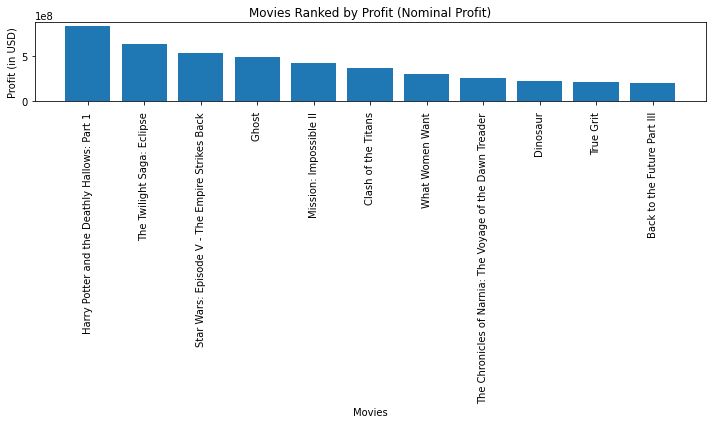

In [24]:
import matplotlib.pyplot as plt


import matplotlib.pyplot as plt


validMovies = [movie for movie in movies_list if isinstance(movie['Profit'], (int, float))]
sortedMovies = sorted(validMovies, key=lambda x: x['Profit'], reverse=True)[:11]


movieNames = [movie['Name'] for movie in sortedMovies]
profits = [movie['Profit'] for movie in sortedMovies]


plt.figure(figsize=(10, 6))
plt.bar(movieNames, profits)


plt.xlabel('Movies')
plt.ylabel('Profit (in USD)')
plt.title('Movies Ranked by Profit (Nominal Profit)')

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


I thought I'd start by ranking movies by profit and plotting them. Notice some of the movies have unknown profits so I worked my code to only select the movies with known profit. Most of the movies I recognized but I didn't expect Twilight to do so well, and I'd never even heard of Ghost.

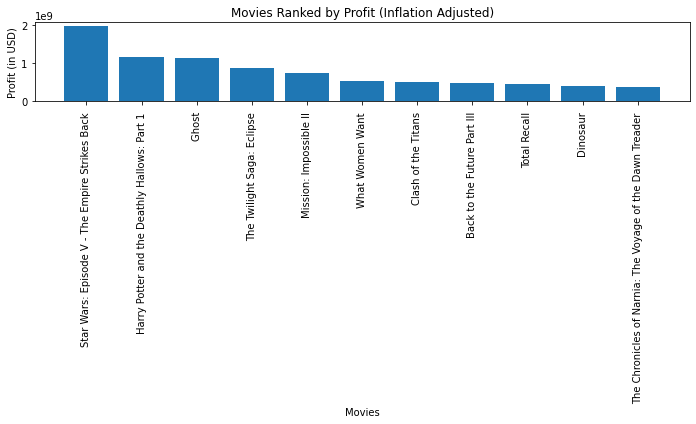

In [25]:
def adjust_for_inflation(amount, start_year, end_year, cpiData):

  
    cpi_start = cpiData[start_year]
    cpi_end = cpiData[end_year]
    
    adjusted_amount = amount * (cpi_end / cpi_start)
    
    return adjusted_amount

cpiData = {
    1980: 82.4,
    1981: 90.9,
    1982: 96.5,
    1983: 99.6,
    1984: 103.9,
    1985: 107.6,
    1986: 109.6,
    1987: 113.6,
    1988: 118.3,
    1989: 124.0,
    1990: 130.7,
    1991: 136.2,
    1992: 140.3,
    1993: 144.5,
    1994: 148.2,
    1995: 152.4,
    1996: 156.9,
    1997: 160.5,
    1998: 163.0,
    1999: 166.6,
    2000: 172.2,
    2001: 177.1,
    2002: 179.9,
    2003: 184.0,
    2004: 188.9,
    2005: 195.3,
    2006: 201.6,
    2007: 207.3,
    2008: 215.3,
    2009: 214.5,
    2010: 218.1,
    2011: 224.9,
    2012: 229.6,
    2013: 233.0,
    2014: 236.7,
    2015: 237.0,
    2016: 240.0,
    2017: 245.1,
    2018: 251.1,
    2019: 255.7,
    2020: 258.8,
    2021: 271.0,
    2022: 292.5,  
    2023: 304.5,  
}


import matplotlib.pyplot as plt


validMovies = [movie for movie in movies_list if isinstance(movie['Profit'], (int, float))]
sortedMovies = sorted(validMovies, key=lambda x: adjust_for_inflation(x['Profit'],x['Date'],2023,cpiData), reverse=True)[:11]


movieNames = [movie['Name'] for movie in sortedMovies]
profits = [adjust_for_inflation(movie['Profit'],movie['Date'],2023,cpiData) for movie in sortedMovies]


plt.figure(figsize=(10, 6))
plt.bar(movieNames, profits)


plt.xlabel('Movies')
plt.ylabel('Profit (in USD)')
plt.title('Movies Ranked by Profit (Inflation Adjusted)')

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()



This plot and code is the exact same as above except for the fact that I adjusted each profit for inflation, specifically how much it would be worth in 2023. I stopped in 2023 since that's all the data I could find, and the important part is that it's a level playing field for all movies. With this accounted for, Star Wars overtakes Harry Potter.

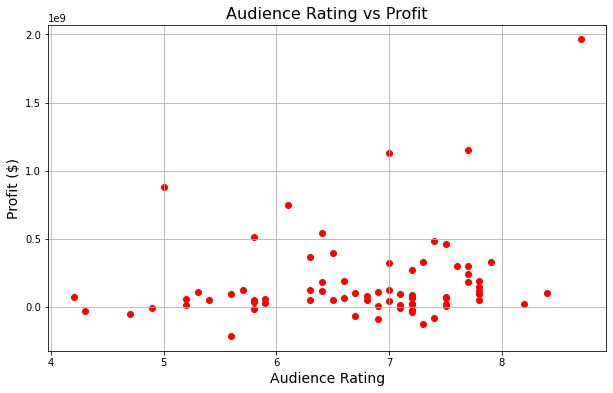

In [26]:
import matplotlib.pyplot as plt


filtered_movies = [movie for movie in movies_list if movie['Profit'] != "UNKNOWN"]


audience_ratings = [movie['Audience Rating'] for movie in filtered_movies]
profits = [adjust_for_inflation(movie['Profit'],movie['Date'],2023,cpiData) for movie in filtered_movies]


plt.figure(figsize=(10, 6))
plt.scatter(audience_ratings, profits, color='red', marker='o')

plt.title('Audience Rating vs Profit', fontsize=16)
plt.xlabel('Audience Rating', fontsize=14)
plt.ylabel('Profit ($)', fontsize=14)


plt.grid(True)

plt.show()



I decided to go for a correlation here and to my surprise rating isnt really very correlated with profit. It would be interesting to make a line of best fit, and then declare that all the movies under the line are underrated, since they were presumably good movies that unfortanetly didn't make much money.

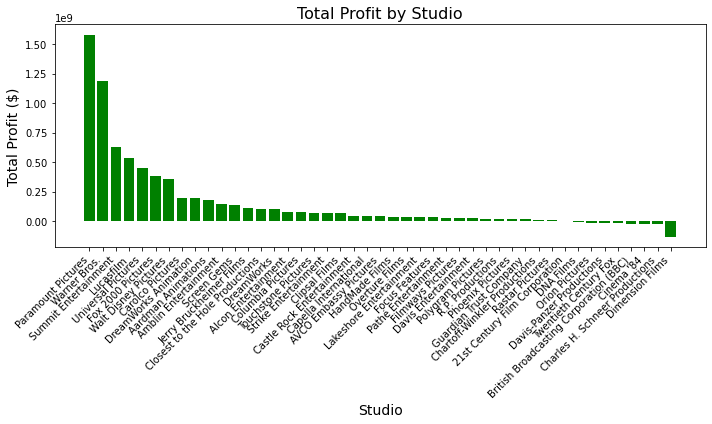

7


In [27]:
import matplotlib.pyplot as plt
from collections import defaultdict

studio_profits = defaultdict(int)

for movie in movies_list:
    if movie['Profit'] != "UNKNOWN":
        studio_profits[movie['Studio']] += movie['Profit']
sorted_studio_profits = sorted(studio_profits.items(), key=lambda x: x[1], reverse=True)
studios = [studio for studio, profit in sorted_studio_profits]
profits = [profit for studio, profit in sorted_studio_profits]


plt.figure(figsize=(10, 6))
plt.bar(studios, profits, color='green')


plt.title('Total Profit by Studio', fontsize=16)
plt.xlabel('Studio', fontsize=14)
plt.ylabel('Total Profit ($)', fontsize=14)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()
count = 0
for movie in movies_list:
    if movie['Studio'] == "Paramount Pictures":
        count += 1
print(count)


I ranked each studio by profit, which isnt really fair because alot of studios only made one movie, and Paramount made 7 (I added code to count because I was curious). I was even able to see that some studios lost money, probably because of one big flop. Keep in mind I'm sure this is not a complete list of every movie ever made by these studios.

In [28]:
import pandas as pd

df = pd.DataFrame(movies_list)
df.describe()


,Audience Rating,Duration,Date,Votes
count,80.000000,80.000000,80.000000,8.000000e+01
mean,6.738750,110.375000,1995.137500,1.545628e+05
std,0.945809,15.173574,11.137511,1.701522e+05
min,4.200000,81.000000,1980.000000,1.177500e+04
25%,6.250000,99.000000,1987.750000,5.257850e+04
50%,7.000000,112.000000,1995.500000,1.190440e+05
75%,7.425000,122.250000,2002.500000,1.816490e+05
max,8.700000,146.000000,2010.000000,1.132073e+06


Finally, I used the pd DataFrame feature to describe some stats for the data set. It looks like Pandas ignored values such as "Profit" because some of the profits are "UNKNOWN". I could have found the stats manually but decided it wasn't necesarry for my purposes. 

DISCUSSION
a) A quickly solved challenge was that the movies were seperated by time period, but this was quickly resolved by adding all the URLS into a list and webscraping them iteratively. Luckily they were all formatted the same way. If there were hundreds of URLs within the main URL, I would have probably webscraped to extract the URLS, build a list of URLS that way, and then webscrape them all one by one. It was also lucky that the format was stright forward, and the data fit natrally into a pd DataFrame. When cleaning the data, there was alot of issues, all of which are described in the markdown cells. To summarize I had to standardize the runtimes into minute format, I had to convert some features to different data types, I had to calculate the profit myself, I had to handle unknown values, and I had to split some values into two seperate things in the case of "Performace"
b) I was able to see that Paramount and Warner Bros were far and a way the most sucessful studios. I saw that Audience rating isn't correlated very tightly with profit (even when I inflation adjusted profit), or at least it's not as correlated as I thought it would be, and there are a few extreme outliers (IE apparently the twilight movie wasn't very good although it made alot of money), and I found out that people loved Star Wars.
c) There's many different things I could have done with the data. I could have tried to find a correlation between genre and profit. I could have looked at year vs rating or seen if there's any argument to be had for "movies were better back in the day", or any number of things. bascially it all revolves around looking at how one (or multiple) variables predict another variable. Some ideas that would incorporate other data could be to look at the sequels to these movies, and see how they compare with their counterparts in terms of profit, rating, etc. Another really cool idea would be to try and train a LLM to group movies based on their descriptions and see which plots have the most in common. 